In [1]:
import numpy as np
import pandas as pd
import xgboost
import shap
import json 
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/times.ttf')
plt.rc('font',family='Times New Roman')
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


        Age  Workclass  Education-Num  Marital Status  Occupation  \
0      39.0          7           13.0               4           1   
1      50.0          6           13.0               2           4   
2      38.0          4            9.0               0           6   
3      53.0          4            7.0               2           6   
4      28.0          4           13.0               2          10   
...     ...        ...            ...             ...         ...   
32556  27.0          4           12.0               2          13   
32557  40.0          4            9.0               2           7   
32558  58.0          4            9.0               6           1   
32559  22.0          4            9.0               4           1   
32560  52.0          5            9.0               2           4   

       Relationship  Race  Sex  Capital Gain  Capital Loss  Hours per week  \
0                 0     4    1        2174.0           0.0            40.0   
1              

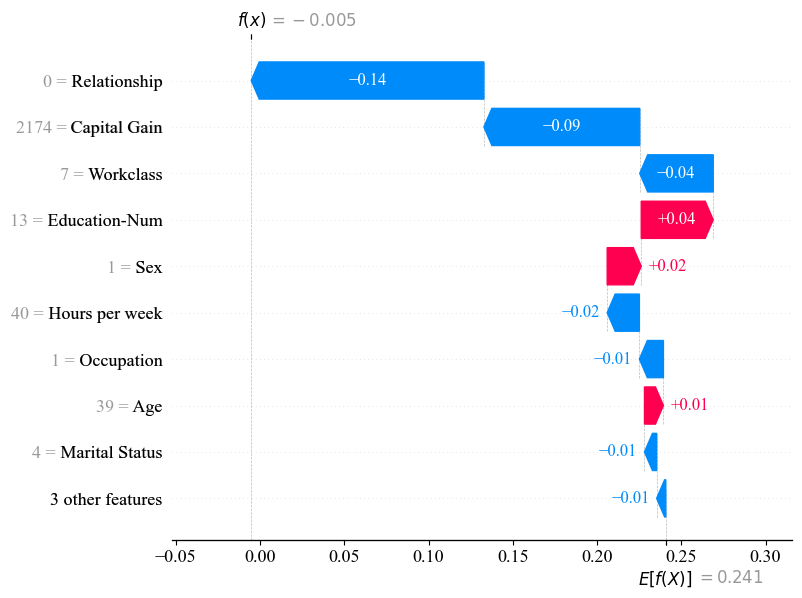

.values =
array([[ 1.1240670e-02, -4.3606903e-02,  4.2715650e-02, ...,
        -6.3228435e-03, -1.9104607e-02,  1.9589391e-04],
       [ 5.8341667e-02, -7.2011776e-02,  1.0206105e-01, ...,
        -1.5392864e-02, -1.7780425e-01,  2.4170754e-03],
       [ 3.1901291e-03,  3.8831353e-03, -4.2075571e-02, ...,
        -5.8236462e-03, -3.6434790e-03, -1.7768855e-04],
       ...,
       [ 4.4268668e-02,  1.6856059e-03, -3.6070399e-02, ...,
        -5.5562425e-03, -1.2608780e-02,  2.9427335e-03],
       [-5.8153134e-02,  1.2347221e-03, -2.5369540e-02, ...,
        -5.7729646e-03, -4.1730102e-02,  7.2093465e-04],
       [ 3.1277098e-02,  2.0359756e-02, -3.0741960e-02, ...,
        -2.4093844e-03, -1.2318305e-03,  3.4827848e-03]], dtype=float32)

.base_values =
array([0.24078454, 0.24078454, 0.24078454, ..., 0.24078454, 0.24078454,
       0.24078454], dtype=float32)

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 4

In [2]:
X, y = shap.datasets.adult()
print(X)
print(y)
model = xgboost.XGBRegressor().fit(X, y)

# 使用SHAP解释模型预测
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
print(shap_values)

In [ ]:
shap.plots.force(shap_values[0])

In [5]:
plt=shap.summary_plot(shap_values.abs(), X)

TypeError: 'Explanation' object is not callable

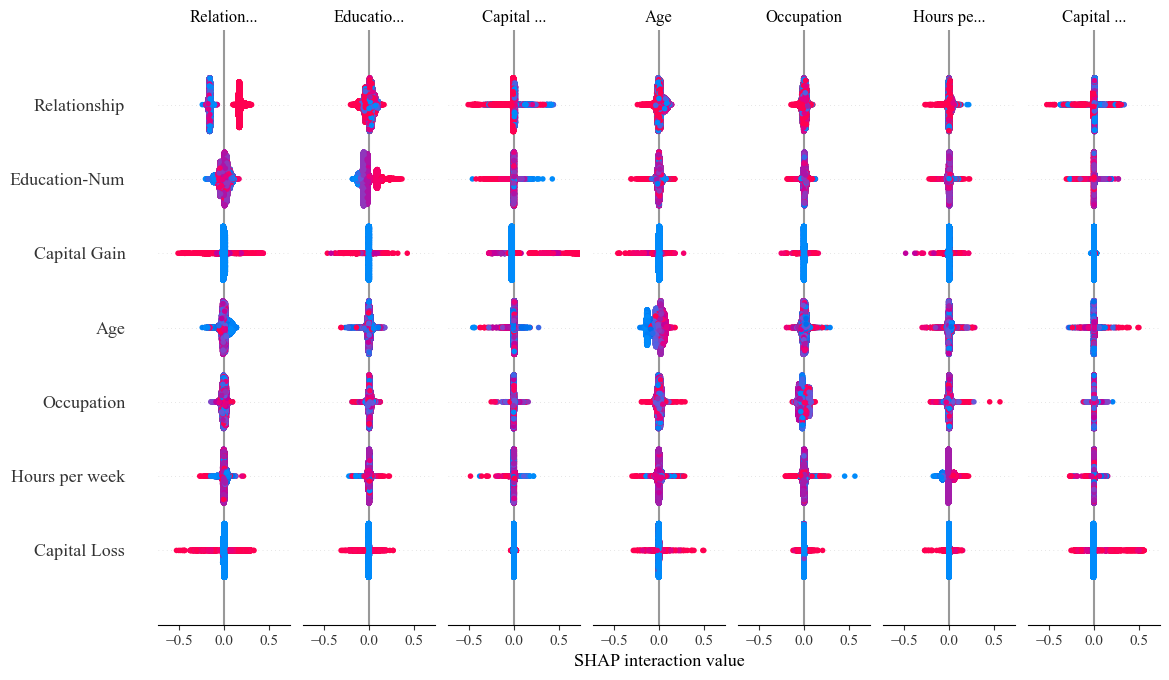

In [12]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)